#  HEART DISEASE PREDICTIONS

      (A Exploratory Data Analysis Report)

# Objective


Project is to perform a exploratory data analysis (EDA) on a heart disease dataset to uncover meaningful patterns, correlations, and risk indicators. By analyzing clinical and features such as age, cholesterol, chest pain type, and exercise-induced angina, the goal is to:





• 	Understand the distribution and behavior of key health 

• 	Identify features most associated with heart disease occurrence

• 	Detect outliers and data quality issues

• 	Prepare the dataset for predictive modeling and clinical decision 



In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Global plot settings
sns.set_theme(style="whitegrid", palette="deep")
plt.rcParams["figure.figsize"] = (10,6)
plt.rcParams["axes.titlesize"] = 14

In [5]:
df = pd.read_csv("S:/Heart Disease.csv")
print(f"Shape: {df.shape}")
display(df.head(15))


Shape: (918, 12)


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


# Basic Dataset Information
We inspect column data types, missing values, and overall structure to understand how the dataset is organized.

In [6]:
print("----Basic Information----")
print(df.info())

print("---Missing Values Count---")
print(df.isnull().sum())

----Basic Information----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None
---Missing Values Count---
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxH

# Descriptive Statistics
A statistical summary helps identify  (mean, median), and data spread (standard deviation).

In [7]:
print("Descriptive Statistics:")
display(df.describe().T)


Descriptive Statistics:


,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


# Missing Values Visualization
We visualize where missing values exist 

# Missing % and Data Type Overview

We compute and visualize the percentage of missing data by feature, along with each column’s data type.

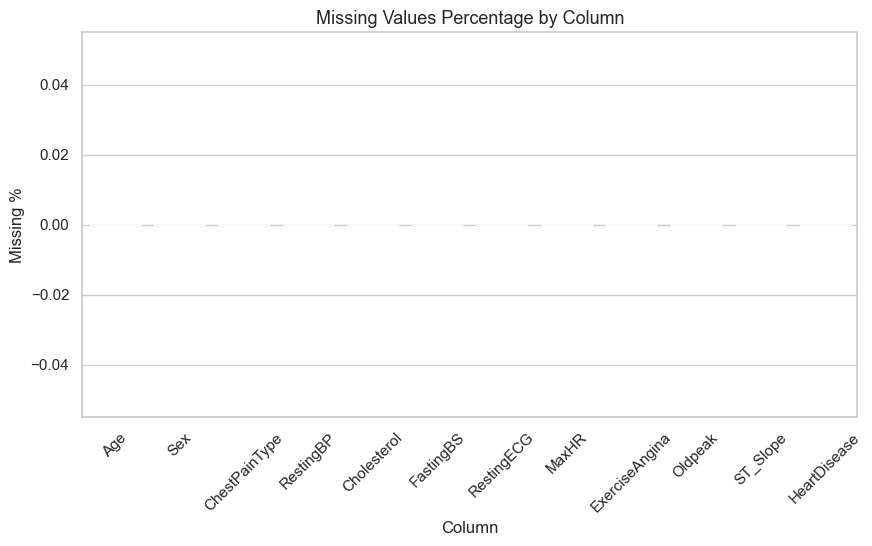

In [9]:
missing = df.isnull().sum() / len(df) * 100
overview = (
    pd.DataFrame({
        "Column": df.columns,
        "Missing %": missing.values,
        "Dtype": df.dtypes.astype(str).values
    }).sort_values("Missing %", ascending=False)
)

plt.figure(figsize=(10,5))
sns.barplot(data=overview, x="Column", y="Missing %", hue="Column",
            dodge=False, palette="rocket", legend=False)
plt.xticks(rotation=45)
plt.title("Missing Values Percentage by Column", fontsize=13)
plt.show()


 # Age Group Analysis – Heart Disease 
- Age 50–69 group shows the highest heart disease prevalence.
- Younger groups (<40) have lower risk, but may still show early signs via cholesterol or ECG anomalies.
- Age interacts strongly with other features like Cholesterol, ST_Slope, and ExerciseAngina — making it a key variable for modeling.



In [10]:
# Create age bins
bins = [0, 30, 40, 50, 60, 70, 80, 100]
labels = ['<30', '30–39', '40–49', '50–59', '60–69', '70–79', '80+']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)

# Group by AgeGroup and calculate heart disease percentage
age_group_stats = df.groupby('AgeGroup', observed=False)['HeartDisease'].agg(
    Total='count',
    HeartDiseaseCases='sum'
)
age_group_stats['% Heart Disease'] = (age_group_stats['HeartDiseaseCases'] / age_group_stats['Total'] * 100).round(2)

# Display summary
display(age_group_stats)

,Total,HeartDiseaseCases,% Heart Disease
AgeGroup,,,
<30,5,0,0.00
30–39,88,32,36.36
40–49,223,93,41.70
50–59,381,222,58.27
60–69,197,145,73.60
70–79,24,16,66.67
80+,0,0,NaN


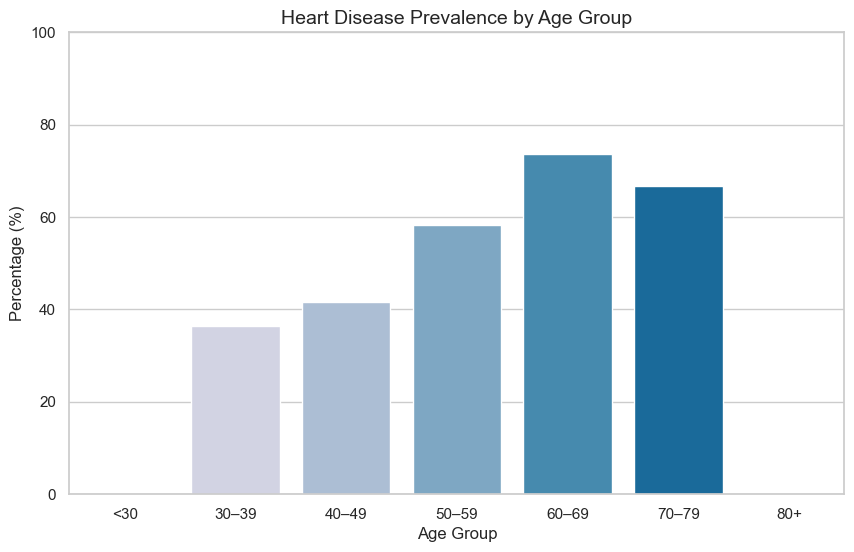

In [62]:
plt.figure(figsize=(10,6))
sns.barplot(
    x=age_group_stats.index,
    y=age_group_stats['% Heart Disease'],
    hue=age_group_stats.index,         # Assign hue to x
    palette="PuBu",
    legend=False                       # Hide redundant legend
)
plt.title("Heart Disease Prevalence by Age Group", fontsize=14)
plt.ylabel("Percentage (%)")
plt.xlabel("Age Group")
plt.ylim(0, 100)

plt.show()

# Cholesterol Distribution by Heart Disease
This boxplot compares cholesterol levels between individuals with and without heart disease. It helps visualize how cholesterol behaves as a potential risk factor.

 Key Observations:
- HeartDisease = 0 (No)
- Median cholesterol ≈ 240
- Most values lie between 210–270
- Few outliers above 300 and below 150
- HeartDisease = 1 (Yes)
- Wider spread of cholesterol values
- Median cholesterol ≈ 250
- Whiskers extend from ~130 to ~560
- More extreme outliers, indicating variability in affected patients




In [12]:
df_clean = df.dropna(subset=["Cholesterol", "HeartDisease"])
df_clean["HeartDisease"] = df_clean["HeartDisease"].astype(str)

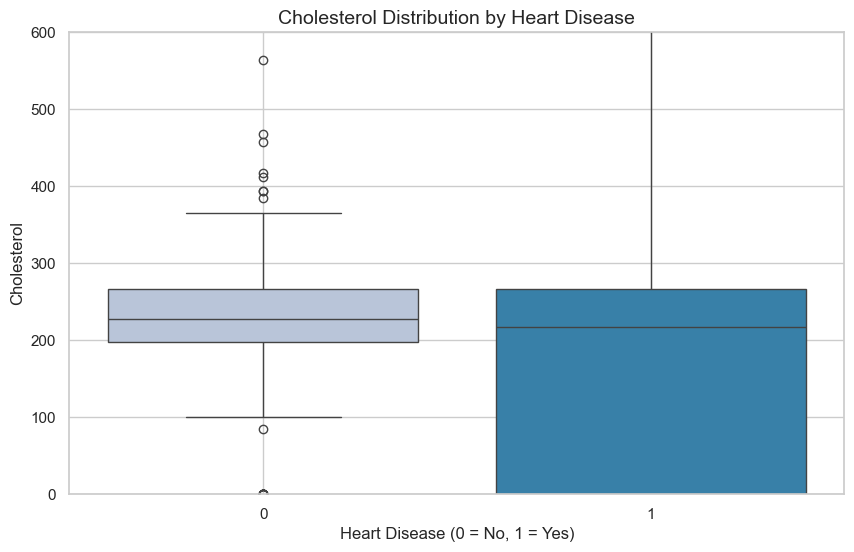

In [64]:
plt.figure(figsize=(10,6))
sns.boxplot(
    x="HeartDisease",
    y="Cholesterol",
    hue="HeartDisease",              # Assign hue to x
    data=df_clean,
    palette="PuBu",
    legend=False                     # Hide redundant legend
)
plt.title("Cholesterol Distribution by Heart Disease", fontsize=14)
plt.xlabel("Heart Disease (0 = No, 1 = Yes)")
plt.ylabel("Cholesterol")
plt.ylim(0, 600)
plt.grid(True)
plt.show()

# Resting BP by ST Slope
- Flat slope shows the widest spread in RestingBP — includes both normal and elevated values
- Up slope clusters around the normal range (120–140 mm Hg) — often seen in healthier patients
- Down slope is rare but tends to show higher RestingBP — may indicate cardiac stress


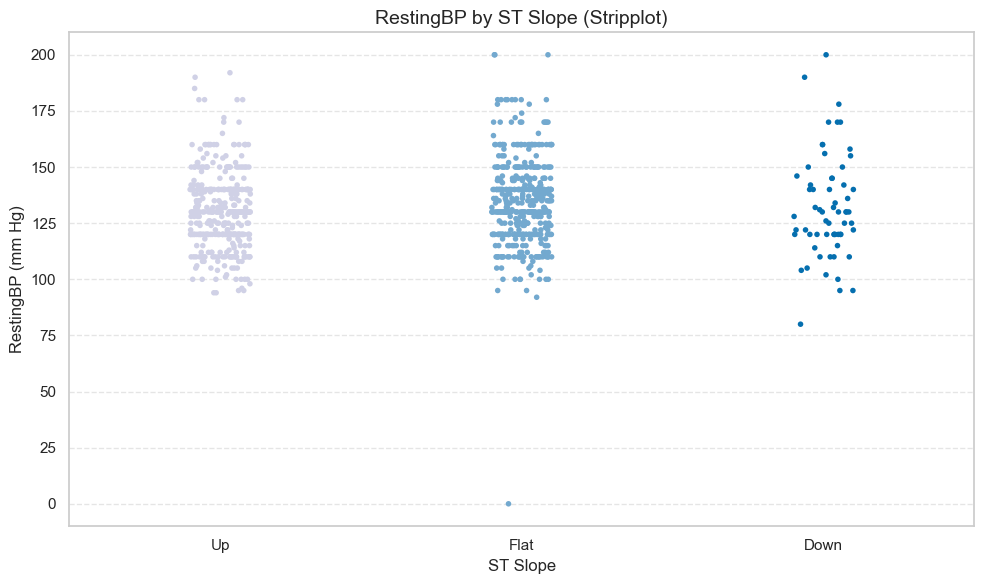

In [65]:
plt.figure(figsize=(10,6))
sns.stripplot(
    x="ST_Slope",
    y="RestingBP",
    hue="ST_Slope",          # Assign hue to match x
    data=df,
    palette="PuBu",
    jitter=True,
    size=4,
    legend=False             # Hide redundant legend
)

plt.title("RestingBP by ST Slope (Stripplot)", fontsize=14)
plt.xlabel("ST Slope")
plt.ylabel("RestingBP (mm Hg)")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Clinical Distribution of Resting Blood Pressure
Resting blood pressure (RestingBP) is a key cardiovascular metric used to assess heart health. In heart disease datasets, including the one you're analyzing, the distribution typically shows:
- Normal range (120–140 mm Hg): This is where the majority of patients fall, especially those with mild or no symptoms.
- Elevated BP (>140 mm Hg): Common among patients with asymptomatic chest pain (ASY) or typical angina (TA), indicating underlying cardiac stress.
- Low BP (<100 mm Hg): Rare, but may appear in younger or hypotensive individuals.


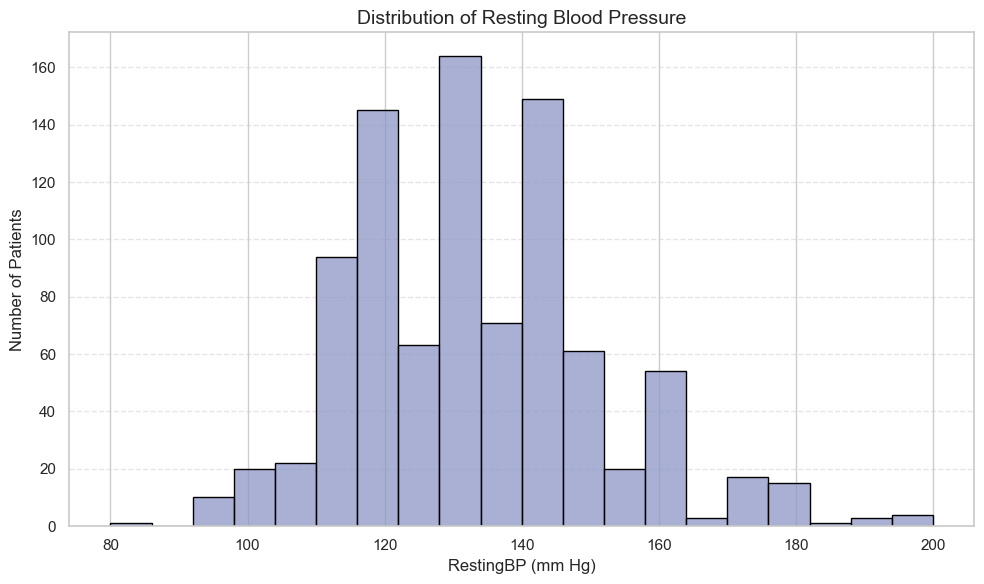

In [103]:
# Filter out zero or missing RestingBP values
df_bp = df[df['RestingBP'] > 0]

# Apply seaborn theme
sns.set_theme(style="whitegrid")

# Plot histogram
plt.figure(figsize=(10,6))
sns.histplot(
    data=df_bp,
    x="RestingBP",
    bins=20,
    color="#8c96c6",
    edgecolor="black"
)

plt.title("Distribution of Resting Blood Pressure", fontsize=14)
plt.xlabel("RestingBP (mm Hg)")
plt.ylabel("Number of Patients")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Distribution of RestingECG Categories
This chart visualizes the proportion of patients across different electrocardiogram (ECG) readings. It helps assess how common each ECG type is in the dataset, which is useful for clinical modeling and feature selection.



# Key Findings:
- Normal: 60.1% of patients
- LVH (Left Ventricular Hypertrophy): 20.5%
- ST (ST-T wave abnormality): 19.4%


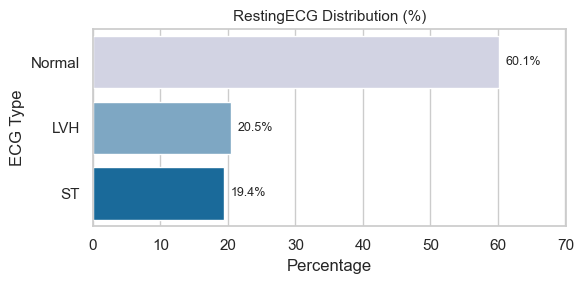

In [69]:
ecg_percent = df['RestingECG'].value_counts(normalize=True) * 100
plt.figure(figsize=(6, 3))
sns.barplot(
    x=ecg_percent.values,
    y=ecg_percent.index,
    hue=ecg_percent.index,
    palette='PuBu',
    dodge=False,
    legend=False
)
for i, val in enumerate(ecg_percent.values):
    plt.text(val + 1, i, f"{val:.1f}%", va='center', fontsize=9)

plt.title("RestingECG Distribution (%)", fontsize=11)
plt.xlabel("Percentage")
plt.ylabel("ECG Type")
plt.xlim(0, max(ecg_percent.values) + 10)
plt.tight_layout()
plt.show()

# Exercise-Induced Angina Distribution
- Angina: Chest pain or discomfort due to reduced blood flow to the heart.
- ExerciseAngina = Y: Patient felt chest pain during physical activity — this is a red flag for possible heart disease.
- ExerciseAngina = N: Patient did not feel chest pain during exercise — relatively safer profile.

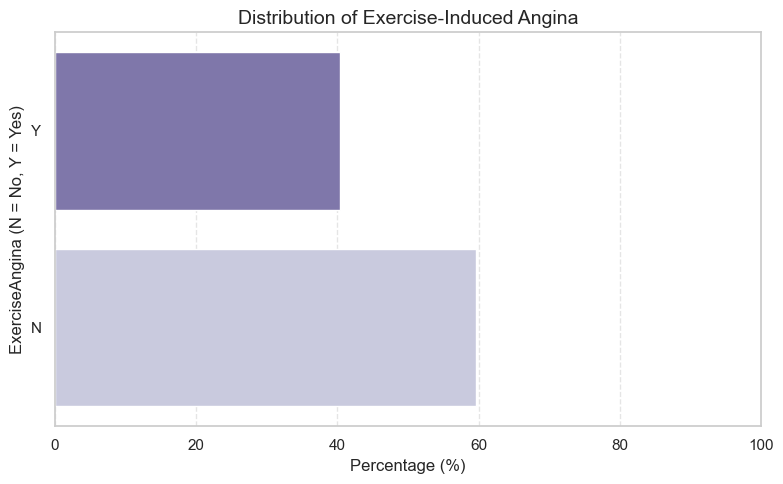

In [17]:
# Calculate percentage distribution
angina_counts = df['ExerciseAngina'].value_counts(normalize=True).sort_values(ascending=True) * 100

# Plot horizontal bar chart
plt.figure(figsize=(8,5))
sns.barplot(
    x=angina_counts.values,
    y=angina_counts.index,
    hue=angina_counts.index,       # Assign hue to y
    palette="Purples_r",
    legend=False                   # Hide redundant legend
)

plt.title("Distribution of Exercise-Induced Angina", fontsize=14)
plt.xlabel("Percentage (%)")
plt.ylabel("ExerciseAngina (N = No, Y = Yes)")
plt.xlim(0, 100)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Numerical Feature Analysis

We analyze numerical variables’ distributions using histograms and boxplots to detect patterns, spread, and outliers.


 Found 7Detect Patterns, Spread, and Outlier                =>hstgm Vs bxpts


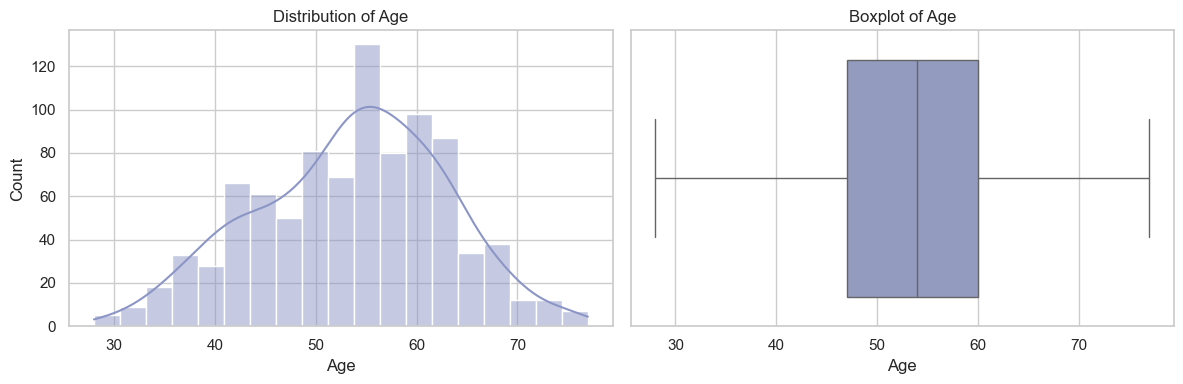

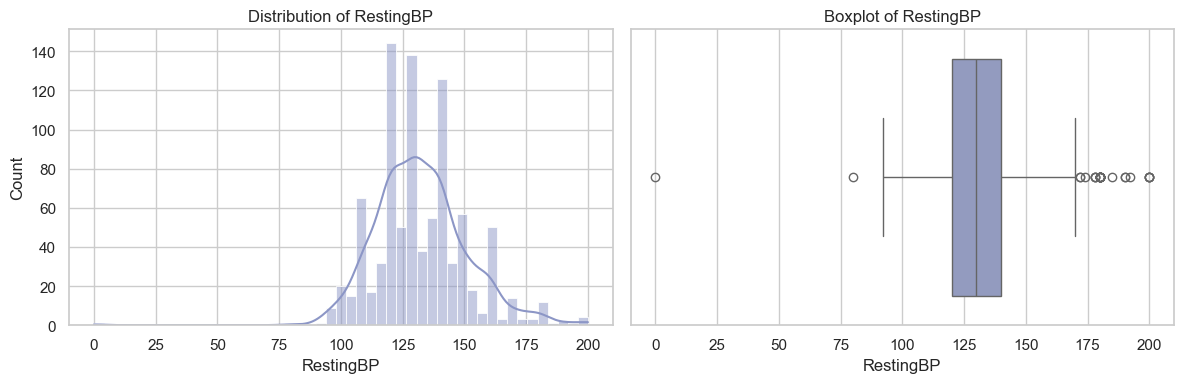

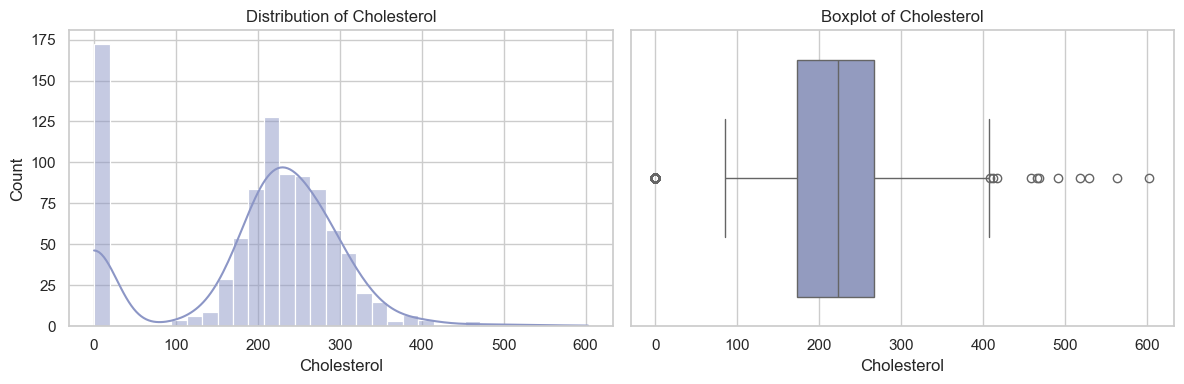

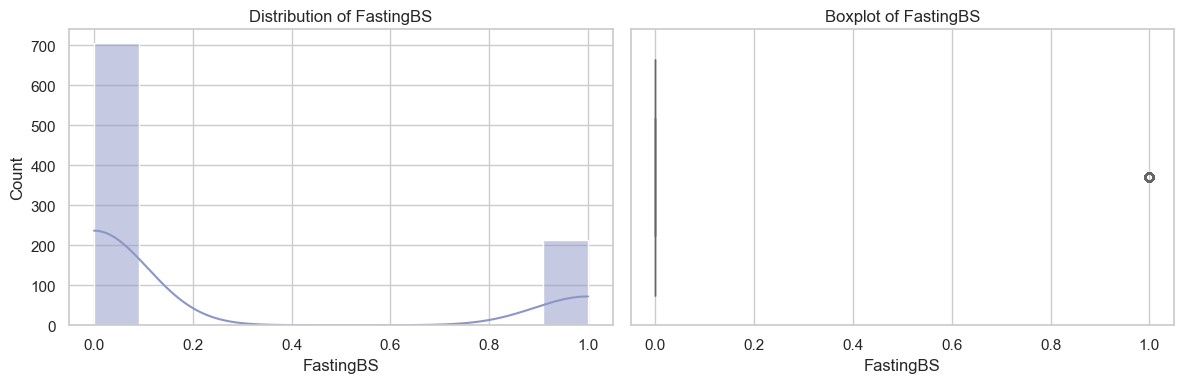

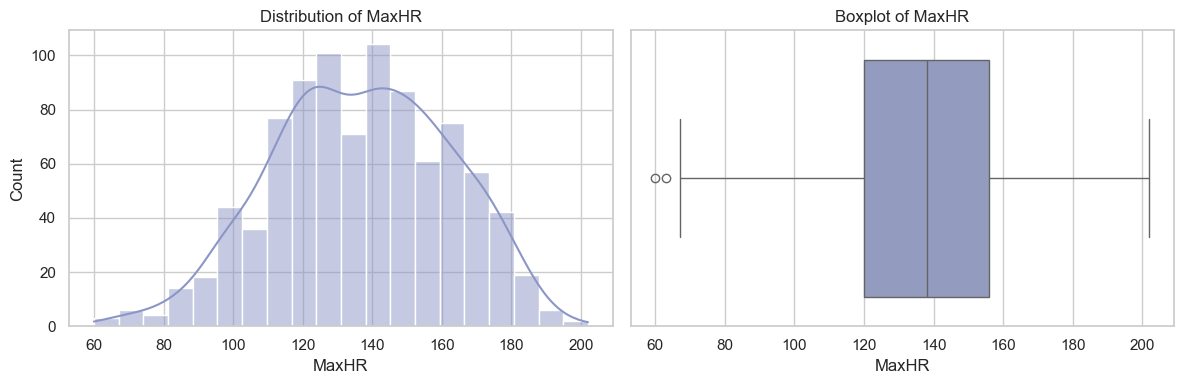

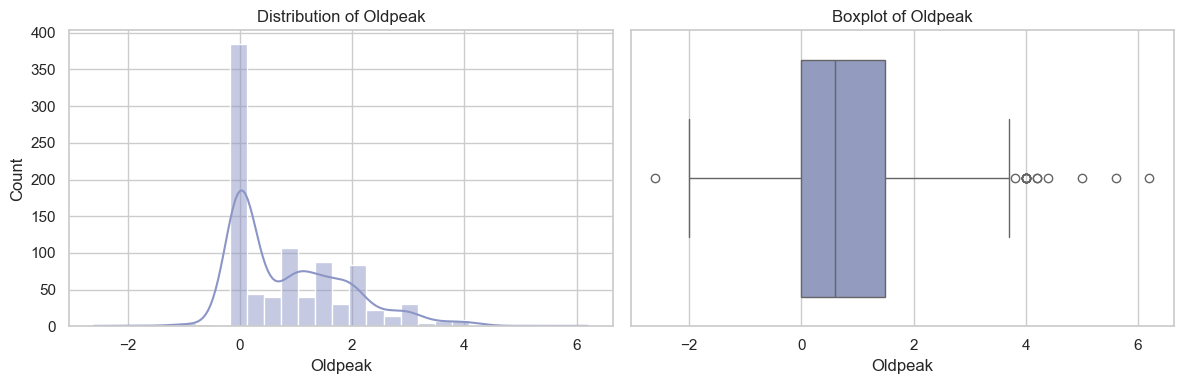

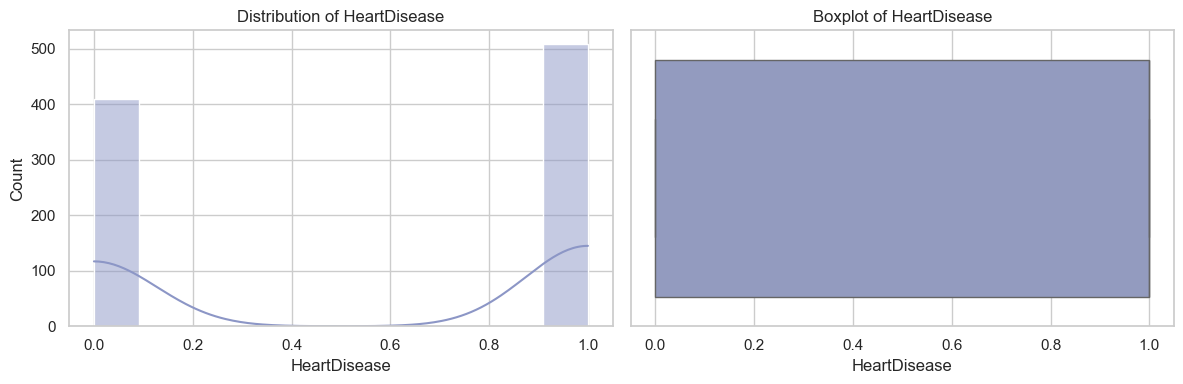

In [102]:
num_cols = df.select_dtypes(include=np.number).columns
print(f"\n Found {len(num_cols)}Detect Patterns, Spread, and Outlier                =>hstgm Vs bxpts")

for col in num_cols:
    fig, ax = plt.subplots(1,2, figsize=(12,4))
    sns.histplot(df[col], 
                 kde=True, 
                 color="#8c96c6", ax=ax[0])
    sns.boxplot(x=df[col], color="#8c96c6", ax=ax[1])
    ax[0].set_title(f"Distribution of {col}")
    ax[1].set_title(f"Boxplot of {col}")
    plt.tight_layout()
    plt.show()


# Categorical Feature Analysis

We check top 10 categories per feature to understand frequency and category dominance.

Found 6 Top 10 Categories


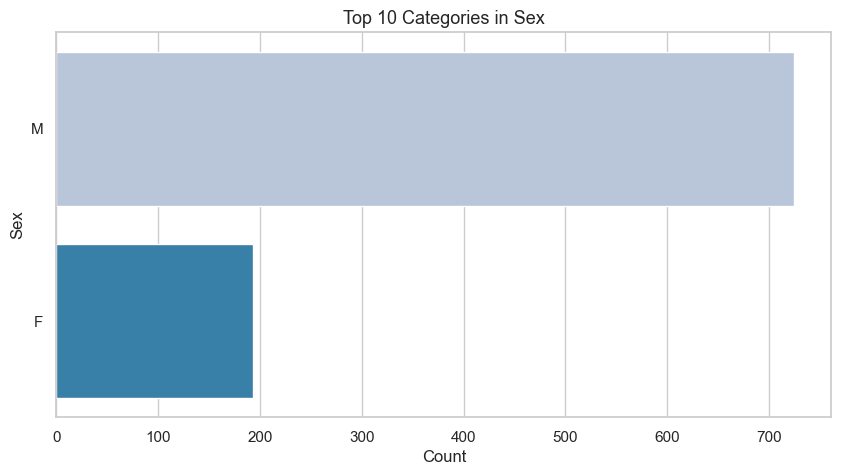

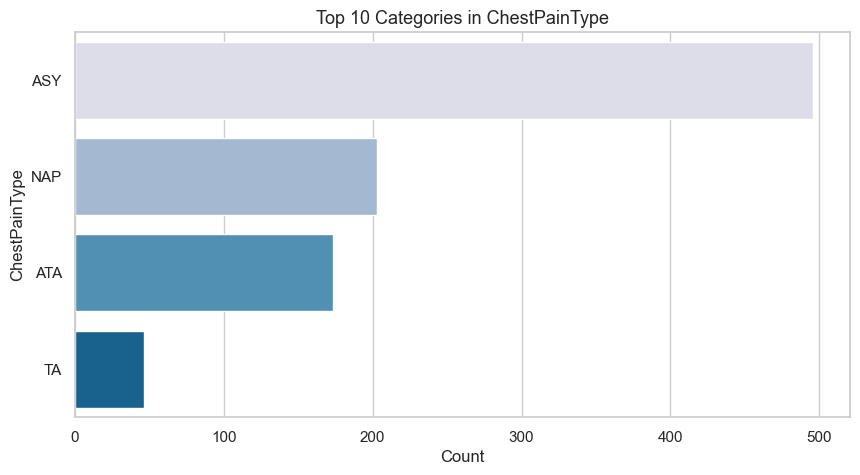

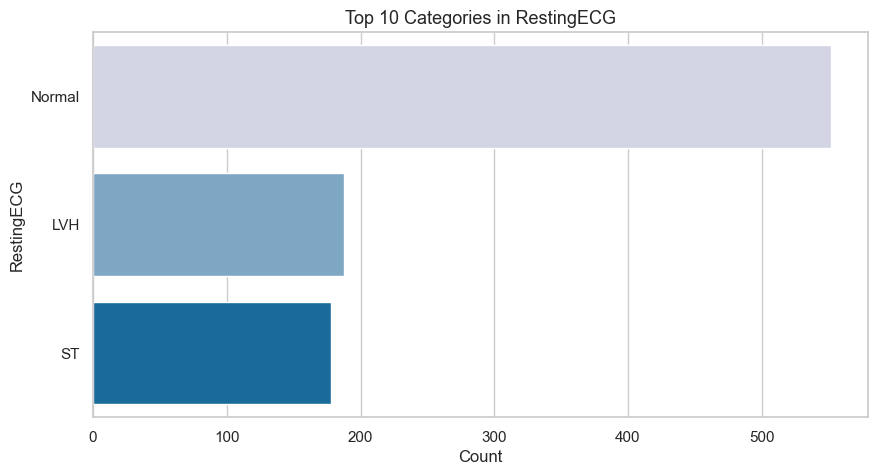

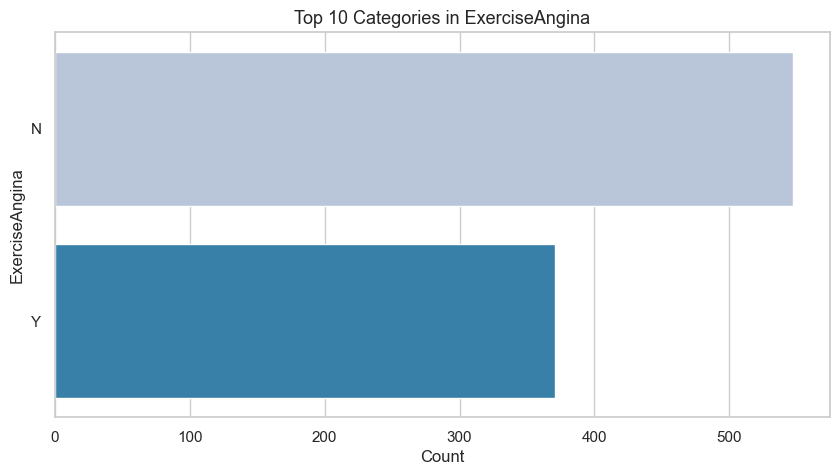

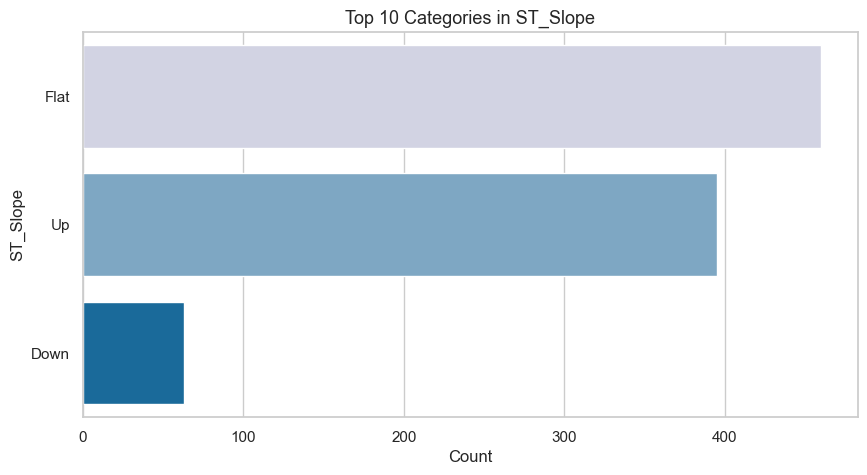

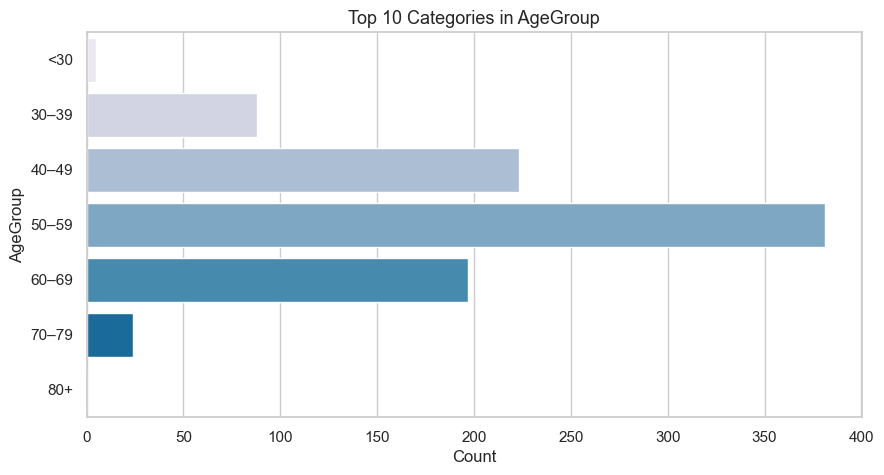

In [83]:

cat_cols = df.select_dtypes(include=['object', 'category']).columns
print(f"Found {len(cat_cols)} Top 10 Categories")

for col in cat_cols:
    plt.figure(figsize=(10,5))
    top_vals = df[col].value_counts().nlargest(10).reset_index()
    top_vals.columns = [col, "Count"]

    sns.barplot(data=top_vals, x="Count", y=col, hue=col,
                dodge=False, palette="PuBu", legend=False)
    plt.title(f"Top 10 Categories in {col}", fontsize=13)
    plt.xlabel("Count")
    plt.ylabel(col)
    plt.show()


# Correlation Analysis

We analyze relationships between numerical features using a heatmap and identify strong correlations.

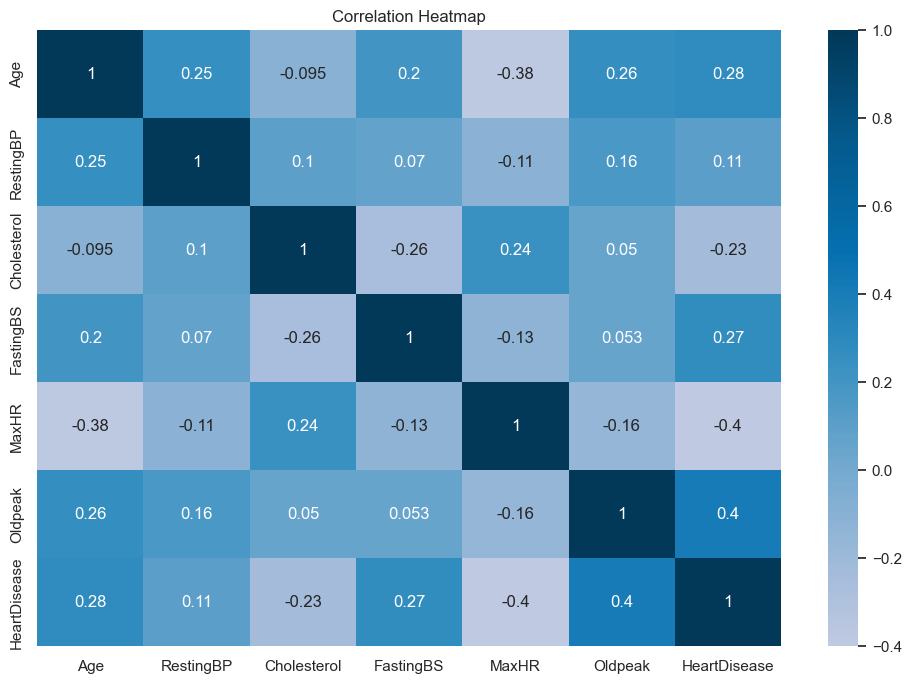

Correlated Feature Pairs (>|0.5|)
Series([], dtype: float64)


In [85]:
plt.figure(figsize=(12,8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="PuBu", center=0)
plt.title("Correlation Heatmap")
plt.show()

corr_unstacked = corr.unstack().sort_values(ascending=False)
high_corr = corr_unstacked[(corr_unstacked < 1) & (corr_unstacked > 0.5)].drop_duplicates()
print("Correlated Feature Pairs (>|0.5|)")
print(high_corr.head(10))


# Pairwise Relationships

We visualize pairwise relationships to identify potential patterns among numeric features.

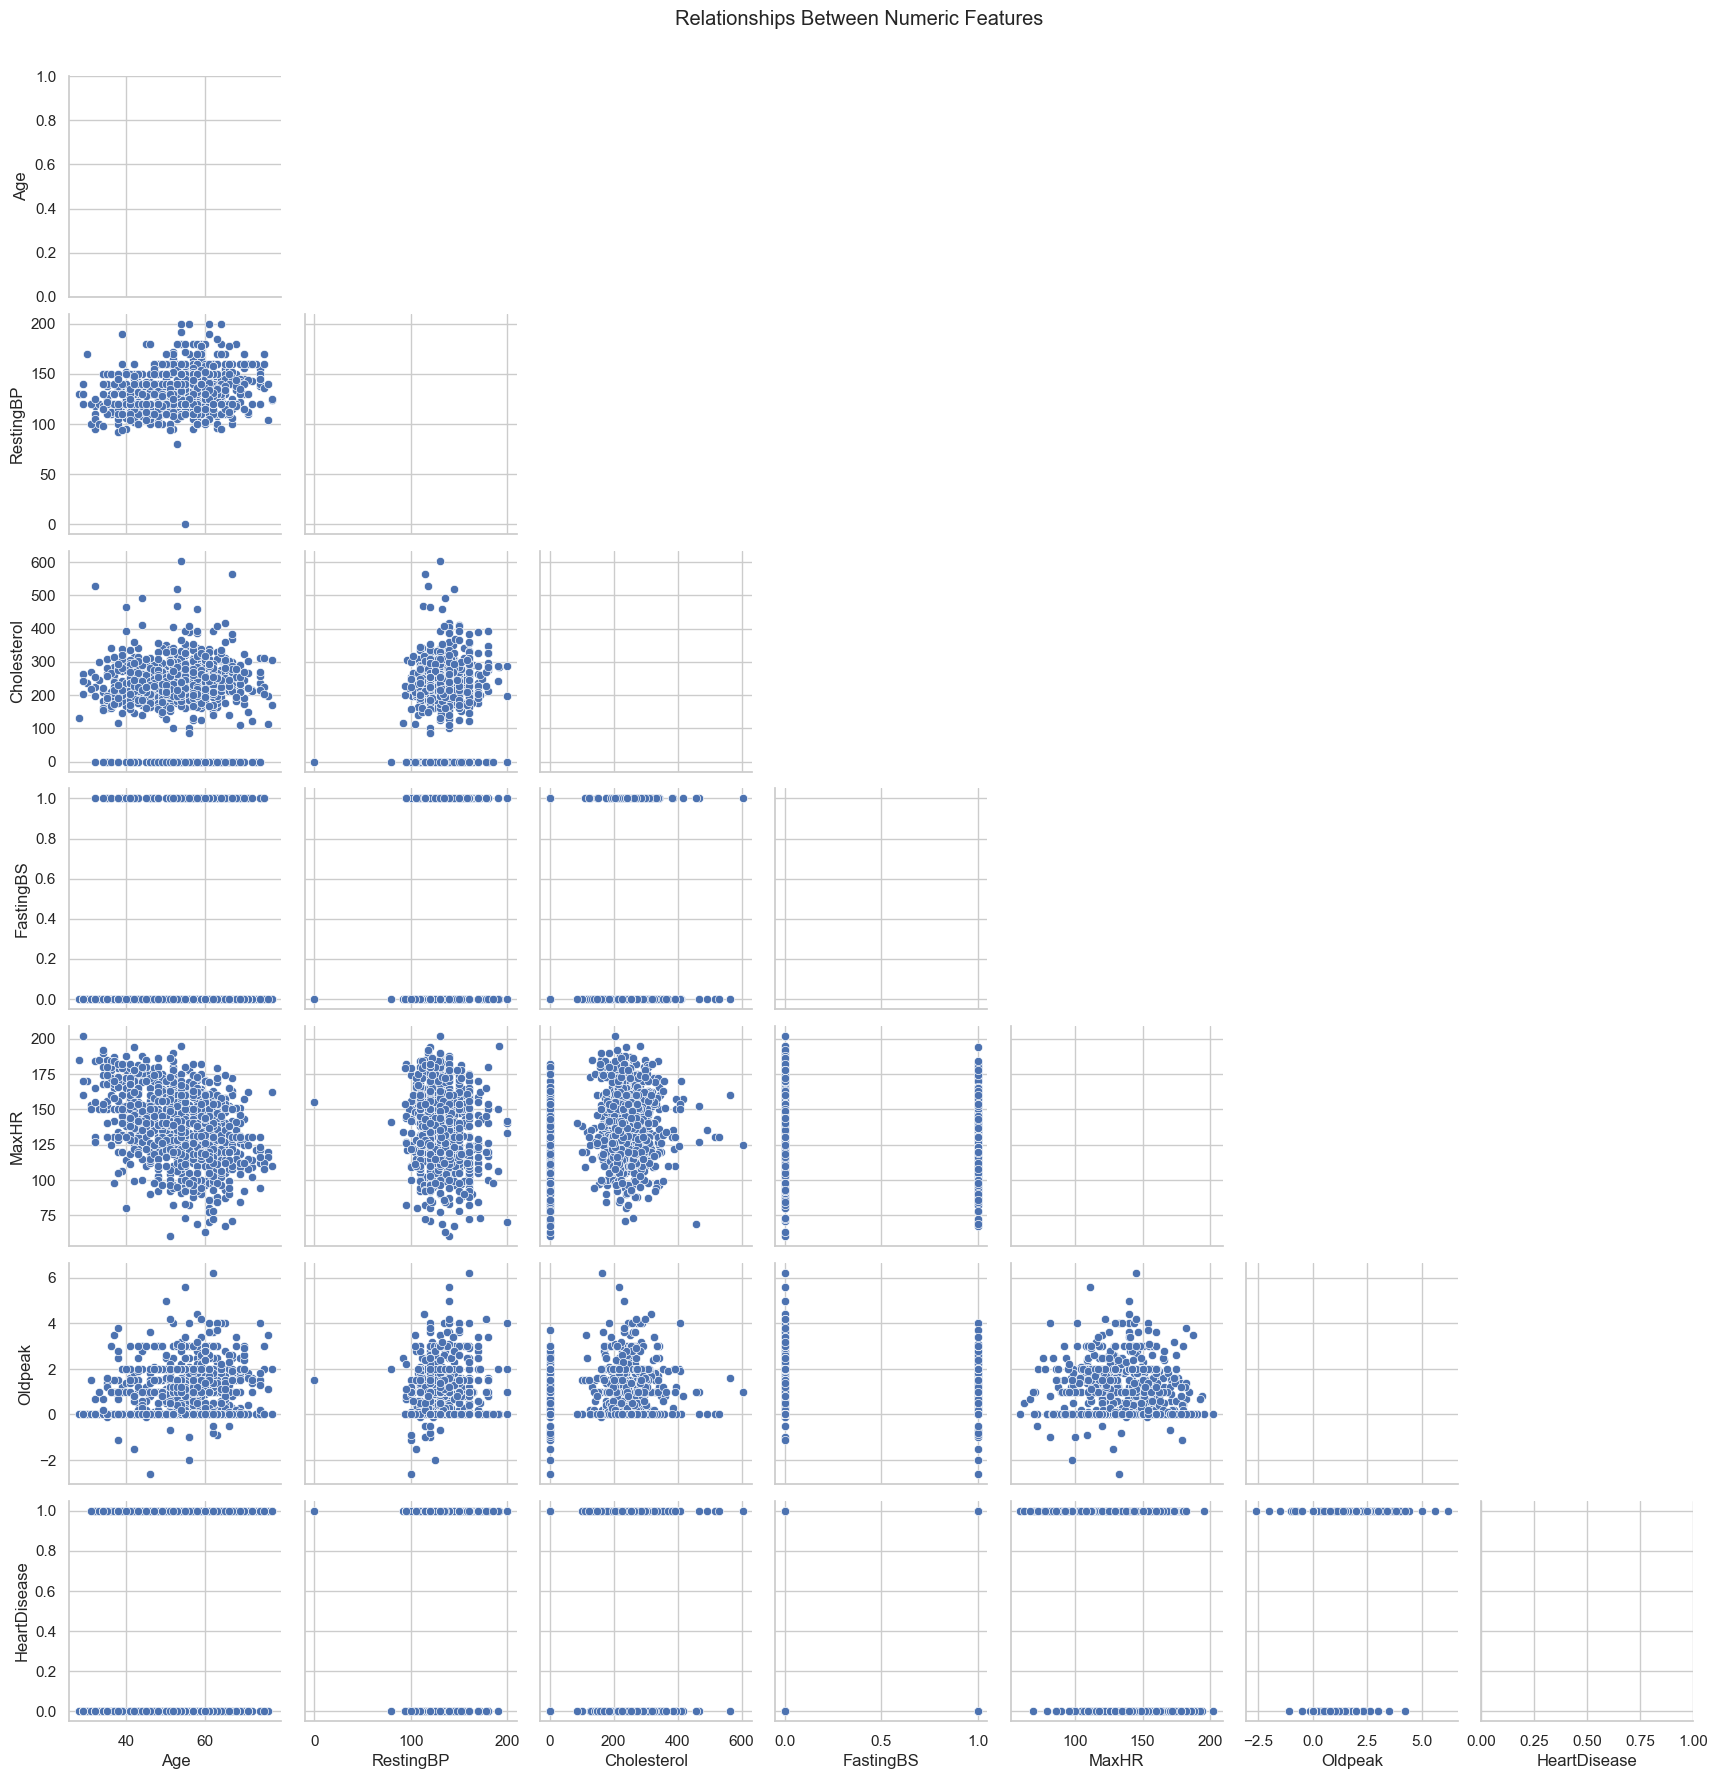

In [86]:
sample_df = df[num_cols].dropna().sample(n=min(1000, len(df)), random_state=42)
sns.pairplot(sample_df, diag_kind='PuBu', corner=True)
plt.suptitle("Relationships Between Numeric Features", y=1.02)
plt.show()


# Outlier Detection (IQR Method)

Outliers can distort analysis. Using the IQR method, we detect extreme values for each numeric feature.

In [87]:
for col in num_cols:
    Q1, Q3 = df[col].quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower, upper = Q1 - 1.5*IQR, Q3 + 1.5*IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    outlier_pct = (len(outliers) / len(df)) * 100
    print(f"{col}: {len(outliers)} outliers ({outlier_pct:.2f}%)")


Age: 0 outliers (0.00%)
RestingBP: 28 outliers (3.05%)
Cholesterol: 183 outliers (19.93%)
FastingBS: 214 outliers (23.31%)
MaxHR: 2 outliers (0.22%)
Oldpeak: 16 outliers (1.74%)
HeartDisease: 0 outliers (0.00%)


# Skewness & Kurtosis

This helps us understand how normally distributed our numeric data is.

In [88]:
sk = pd.DataFrame({
    "Skewness": df[num_cols].skew().round(2),
    "Kurtosis": df[num_cols].kurt().round(2)
})
print("\n Skewness & Kurtosis")
display(sk)



 Skewness & Kurtosis


,Skewness,Kurtosis
Age,-0.20,-0.39
RestingBP,0.18,3.27
Cholesterol,-0.61,0.12
FastingBS,1.26,-0.40
MaxHR,-0.14,-0.45
Oldpeak,1.02,1.20
HeartDisease,-0.22,-1.96


# Feature vs Target (Gender vs  Cholesterol)

Explore how cholesterol varies across gender.







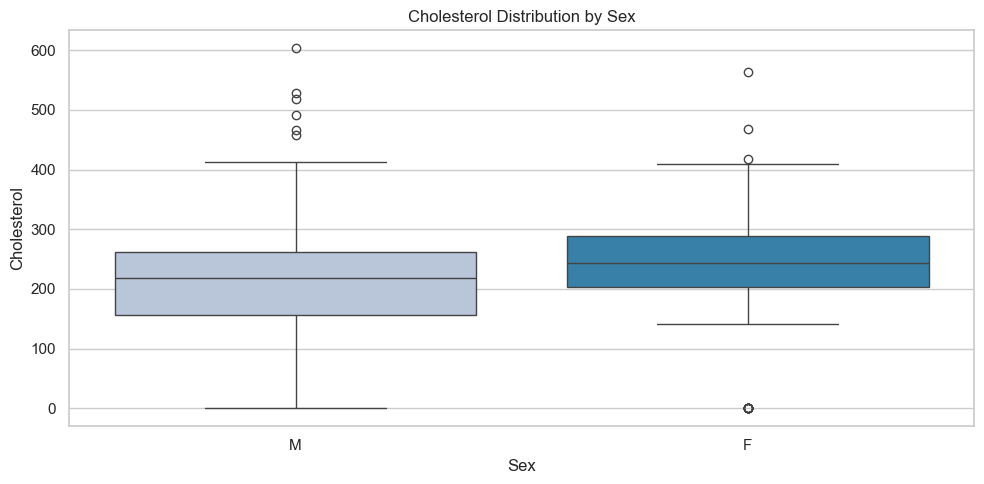

In [90]:
plt.figure(figsize=(10, 5))
sns.boxplot(
    x='Sex',
    y='Cholesterol',
    data=df,
    hue='Sex',              # Required to use palette safely
    palette='PuBu',
    dodge=False,
    legend=False            # Optional: disables duplicate legend
)
plt.title("Cholesterol Distribution by Sex")
plt.xlabel("Sex")
plt.ylabel("Cholesterol")
plt.tight_layout()
plt.show()

 # Category vs Target (ChestPainType vs Cholesterol)
Analyze how chest pain type influences cholesterol levels.

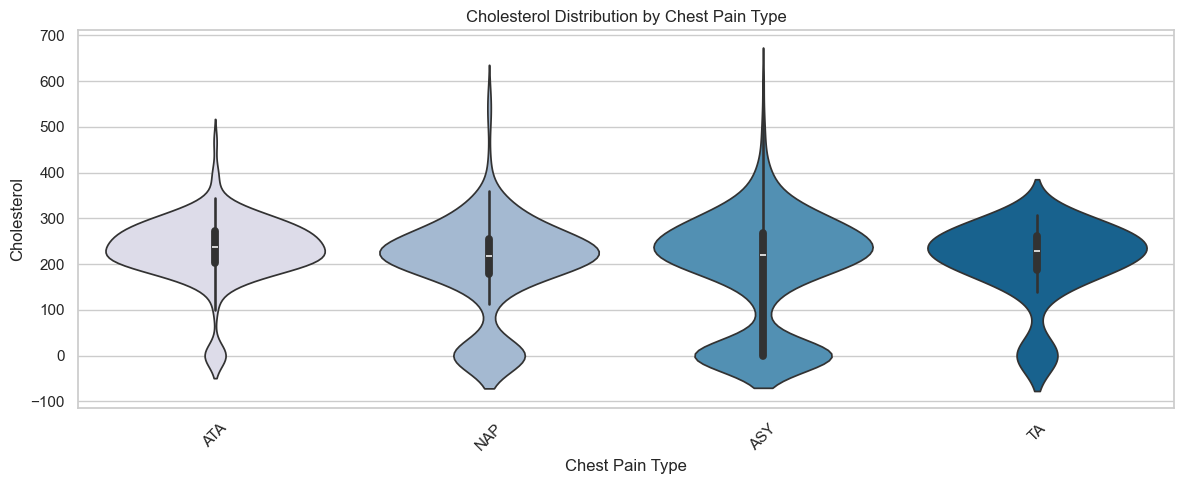

In [92]:
plt.figure(figsize=(12, 5))
sns.violinplot(
    x='ChestPainType',
    y='Cholesterol',
    data=df,
    hue='ChestPainType',     # Required for palette usage
    palette='PuBu',
    dodge=False,
    legend=False             # Optional: disables duplicate legend
)
plt.title("Cholesterol Distribution by Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Cholesterol")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Distribution of Resting Blood Pressure by Chest Pain Type
This boxplot compares resting blood pressure levels across different chest pain categories. It helps visualize how blood pressure varies based on the nature of chest discomfort, which is clinically relevant for heart disease assessment.




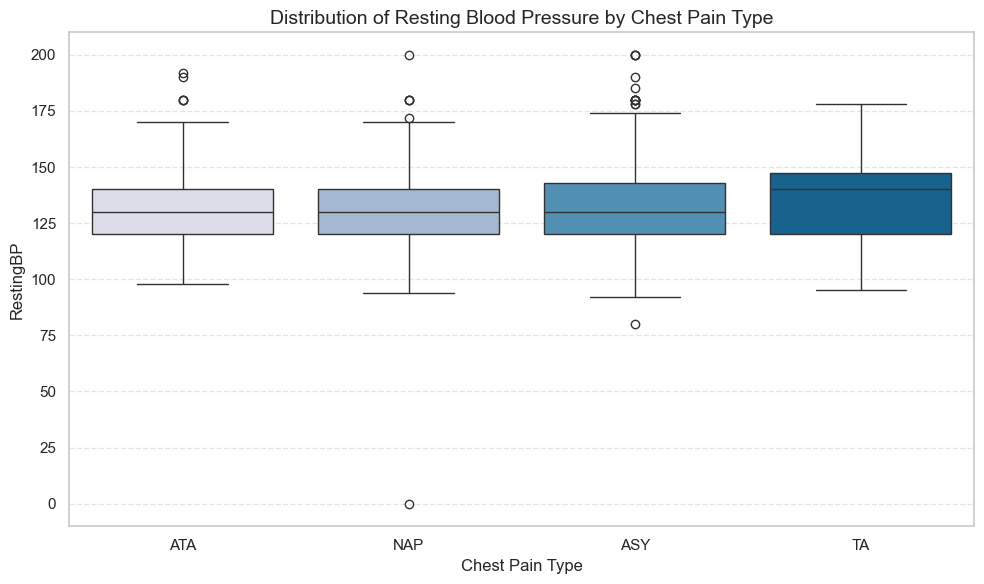

In [91]:
# Drop missing values if any
df_clean = df.dropna(subset=["RestingBP", "ChestPainType"])

# Plot boxplot safely
plt.figure(figsize=(10, 6))
sns.boxplot(
    x="ChestPainType",
    y="RestingBP",
    data=df_clean,
    hue="ChestPainType",     # Required for palette usage
    palette="PuBu",
    dodge=False,
    legend=False             # Optional: disables duplicate legend
)

# Styling
plt.title("Distribution of Resting Blood Pressure by Chest Pain Type", fontsize=14)
plt.xlabel("Chest Pain Type")
plt.ylabel("RestingBP")
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# MaxHR 
MaxHR (Maximum Heart Rate) refers to the highest number of heartbeats per minute your heart can safely reach during intense physical activity. It’s often estimated using the formula:
MaxHR ≈ 220 − Age

Why is MaxHR important in heart disease?
- Low MaxHR values during stress or exercise may indicate reduced cardiac efficiency—this can be an early sign of heart disease.
- High MaxHR without symptoms usually reflects better cardiovascular fitness.
- Abnormal MaxHR response (like sudden drops or flat curves during exercise) may suggest:
- Ischemia (lack of oxygen to the heart)
- Arrhythmia (irregular heartbeat)
- Autonomic dysfunction (nervous system imbalance)




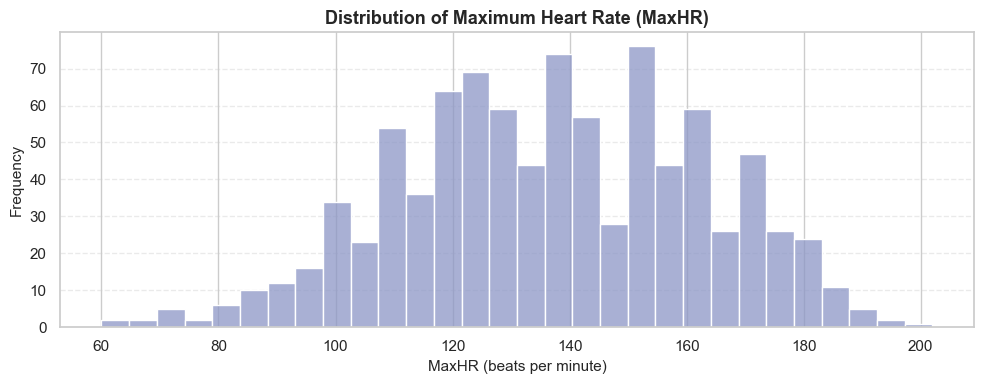

In [100]:
# Plot histogram of MaxHR
plt.figure(figsize=(10, 4))
sns.histplot(
    data=df,
    x='MaxHR',
    bins=30,
    color='#8c96c6',
    kde=False
)

# Styling
plt.title("Distribution of Maximum Heart Rate (MaxHR)", fontsize=13, weight='bold')
plt.xlabel("MaxHR (beats per minute)", fontsize=11)
plt.ylabel("Frequency", fontsize=11)
plt.grid(True, axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

# Chest Pain Type Distribution
- **ASY (Asymptomatic)**: 54% — most common, often linked with silent heart disease
- **NAP (Non-Anginal Pain)**: 22.1% — moderate prevalence
- **Other Types**: 23.9% — includes atypical or mixed pain presentations

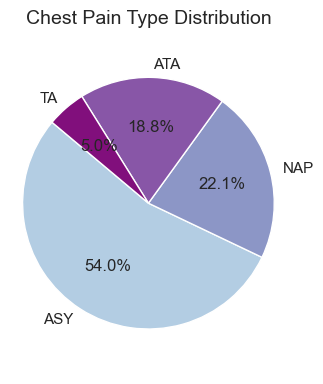

In [95]:
# Count values (percentage)
pain_counts = df['ChestPainType'].value_counts(normalize=True) * 100

# Plot pie chart
plt.figure(figsize=(3.4,4))
plt.pie(
    pain_counts.values,
    labels=pain_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=['#b3cde3', '#8c96c6', '#8856a7', '#810f7c']  # Purple shades
)

plt.title("Chest Pain Type Distribution", fontsize=14)
plt.axis('equal')  # Equal aspect ratio ensures perfect circle
plt.tight_layout()
plt.show()

# Correlation Cluster Map

A cluster map helps detect feature groups with similar relationships.

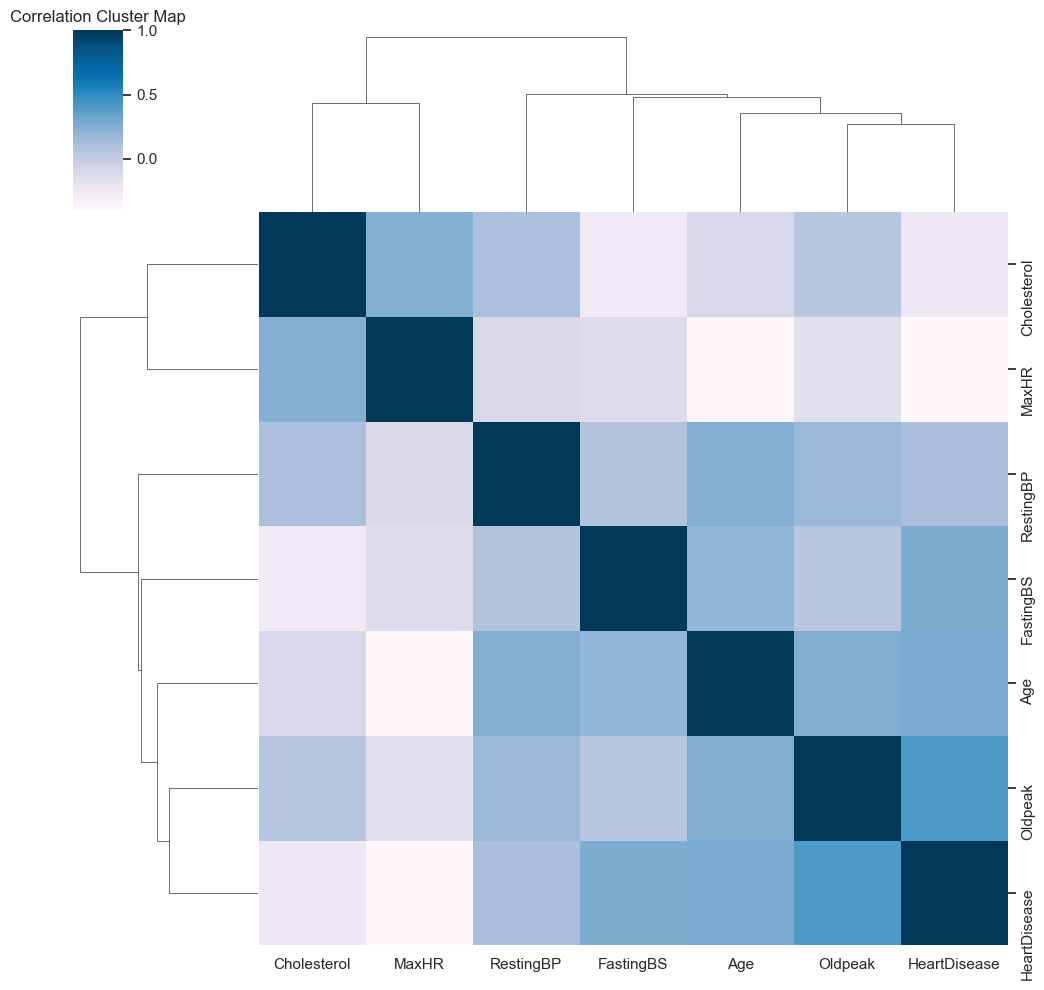

In [96]:
sns.clustermap(corr.fillna(0), cmap="PuBu", annot=False)
plt.title("Correlation Cluster Map")
plt.show()


# Sex vs ChestPainType Relationship
Visualize gender-based chest pain type distribution.

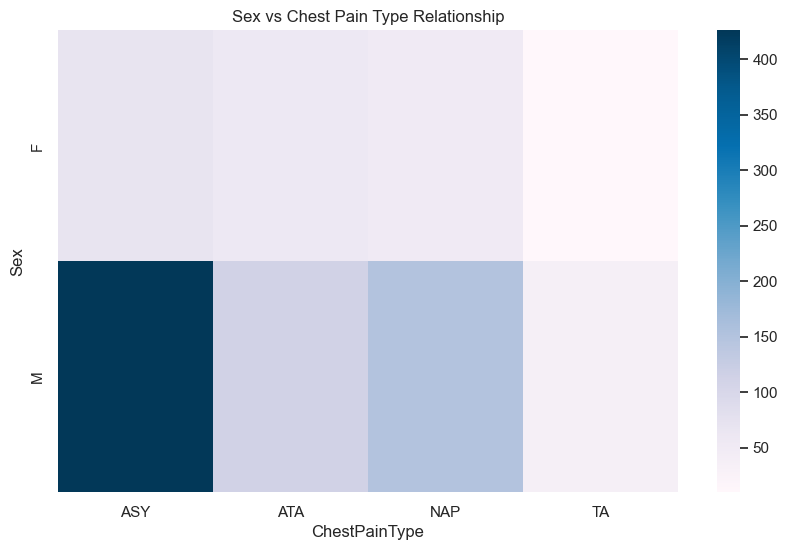

In [97]:
cross_tab = pd.crosstab(df['Sex'], df['ChestPainType'])
plt.figure(figsize=(10,6))
sns.heatmap(cross_tab, cmap="PuBu")
plt.title("Sex vs Chest Pain Type Relationship")
plt.show()

# Save Cleaned Dataset

After cleaning, we export a fresh dataset for modeling or further analysis.

In [98]:
cleaned = df.dropna(how='all')
cleaned.to_csv("cleaned_dataset.csv", index=False)
print("\n Cleaned dataset saved as 'cleaned_dataset.csv'")



 Cleaned dataset saved as 'cleaned_dataset.csv'


# Automated Insights Summary
Final step: A concise summary of the dataset after analysis.

In [99]:
print("\n--- AUTOMATED EDA INSIGHTS SUMMARY ---")
print(f"Total Rows: {df.shape[0]}")
print(f"Total Columns: {df.shape[1]}")
print(f"Numeric Columns: {len(num_cols)}")
print(f"Categorical Columns: {len(cat_cols)}")
print(f"Columns with Missing Values: {(df.isnull().sum()>0).sum()}")



--- AUTOMATED EDA INSIGHTS SUMMARY ---
Total Rows: 918
Total Columns: 13
Numeric Columns: 7
Categorical Columns: 6
Columns with Missing Values: 0


#  Summary – Heart Disease Dataset 

- Heart disease is more common in ages 50–69
- Cholesterol is higher and more variable in affected patients
- Key predictors: RestingBP, ChestPainType, ECG, ExerciseAngina
- Some numeric features show outliers and skewness
- Moderate correlations suggest need for feature selection or dimensionality reduction
